# -- Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- Output: Number of predicted wins (W)



-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 

In [1]:
#import Libary 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
baseball=pd.read_csv('baseball.csv')
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#check out null values
print(baseball.isna().values.any())
baseball.isna().sum()

False


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

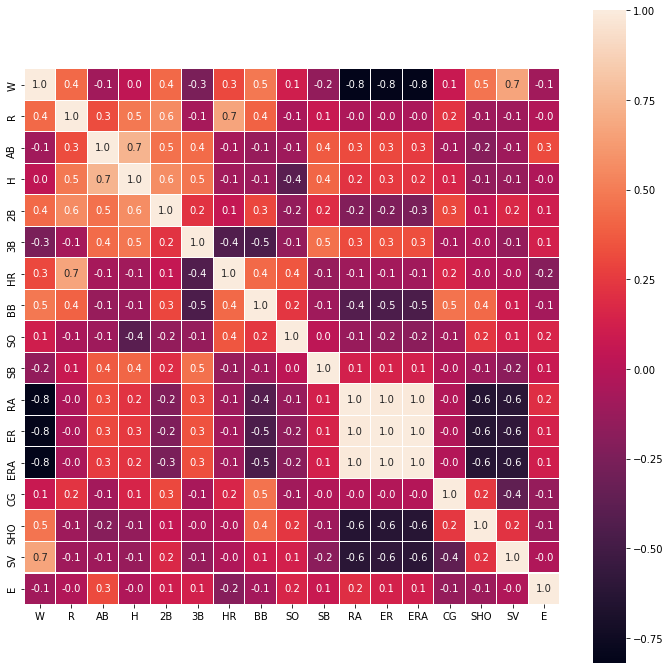

In [6]:
#Check Out Correlation
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(baseball.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

In [7]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


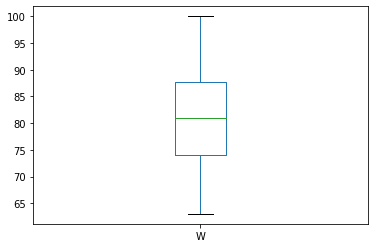

In [8]:
baseball['W'].plot.box()

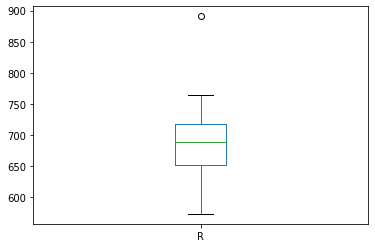

In [9]:
baseball['R'].plot.box()

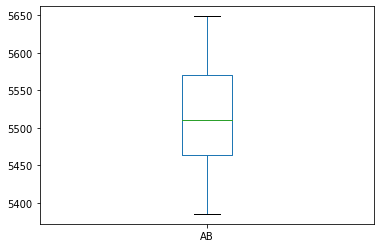

In [10]:
baseball['AB'].plot.box()

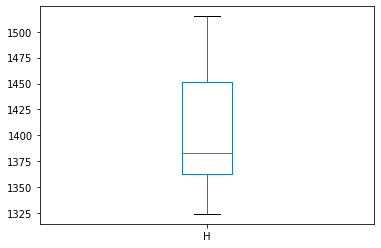

In [11]:
baseball['H'].plot.box()

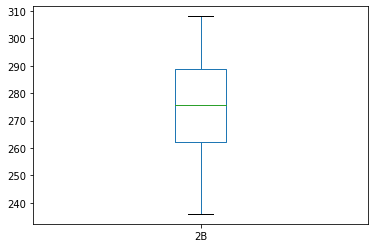

In [12]:
baseball['2B'].plot.box()

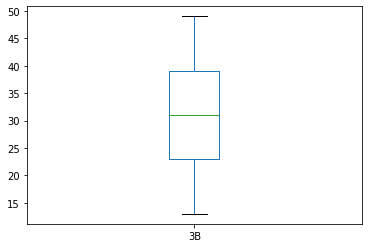

In [13]:
baseball['3B'].plot.box()

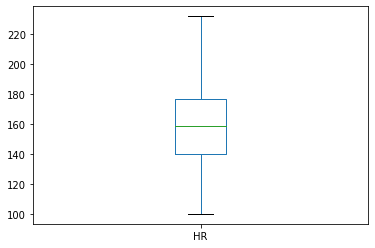

In [14]:
baseball['HR'].plot.box()

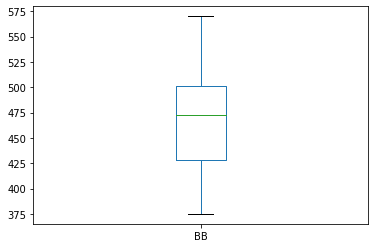

In [15]:
baseball['BB'].plot.box()

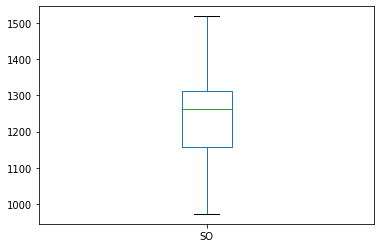

In [16]:
baseball['SO'].plot.box()

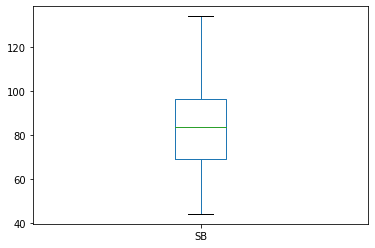

In [17]:
baseball['SB'].plot.box()

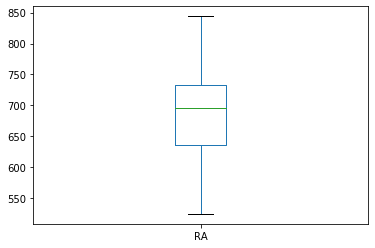

In [18]:
baseball['RA'].plot.box()

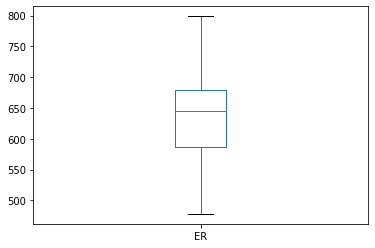

In [19]:
baseball['ER'].plot.box()

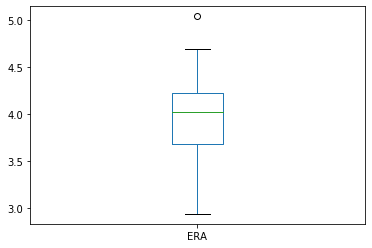

In [20]:
baseball['ERA'].plot.box()

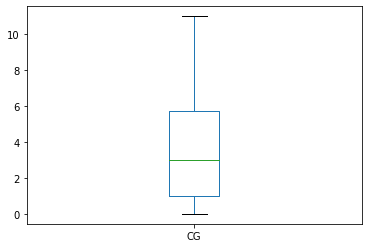

In [21]:
baseball['CG'].plot.box()

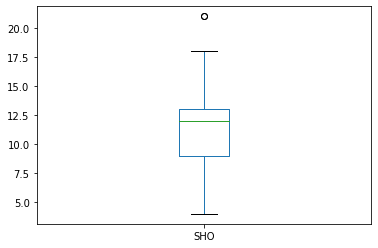

In [22]:
baseball['SHO'].plot.box()

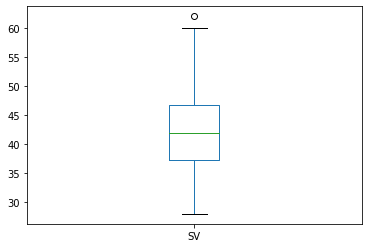

In [23]:
baseball['SV'].plot.box()

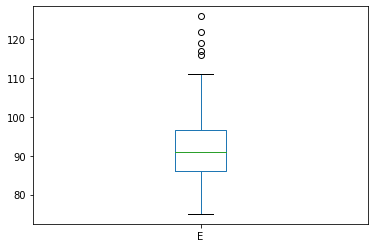

In [24]:
baseball['E'].plot.box()

In [25]:
#lets check for outliers using z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(baseball))
baseball_new=baseball.loc[(abs(z)<3).all(axis=1)]
print(baseball.shape)
print(baseball_new.shape)
#from below output it is clear that some outliers were there and now these are removed

(30, 17)
(29, 17)


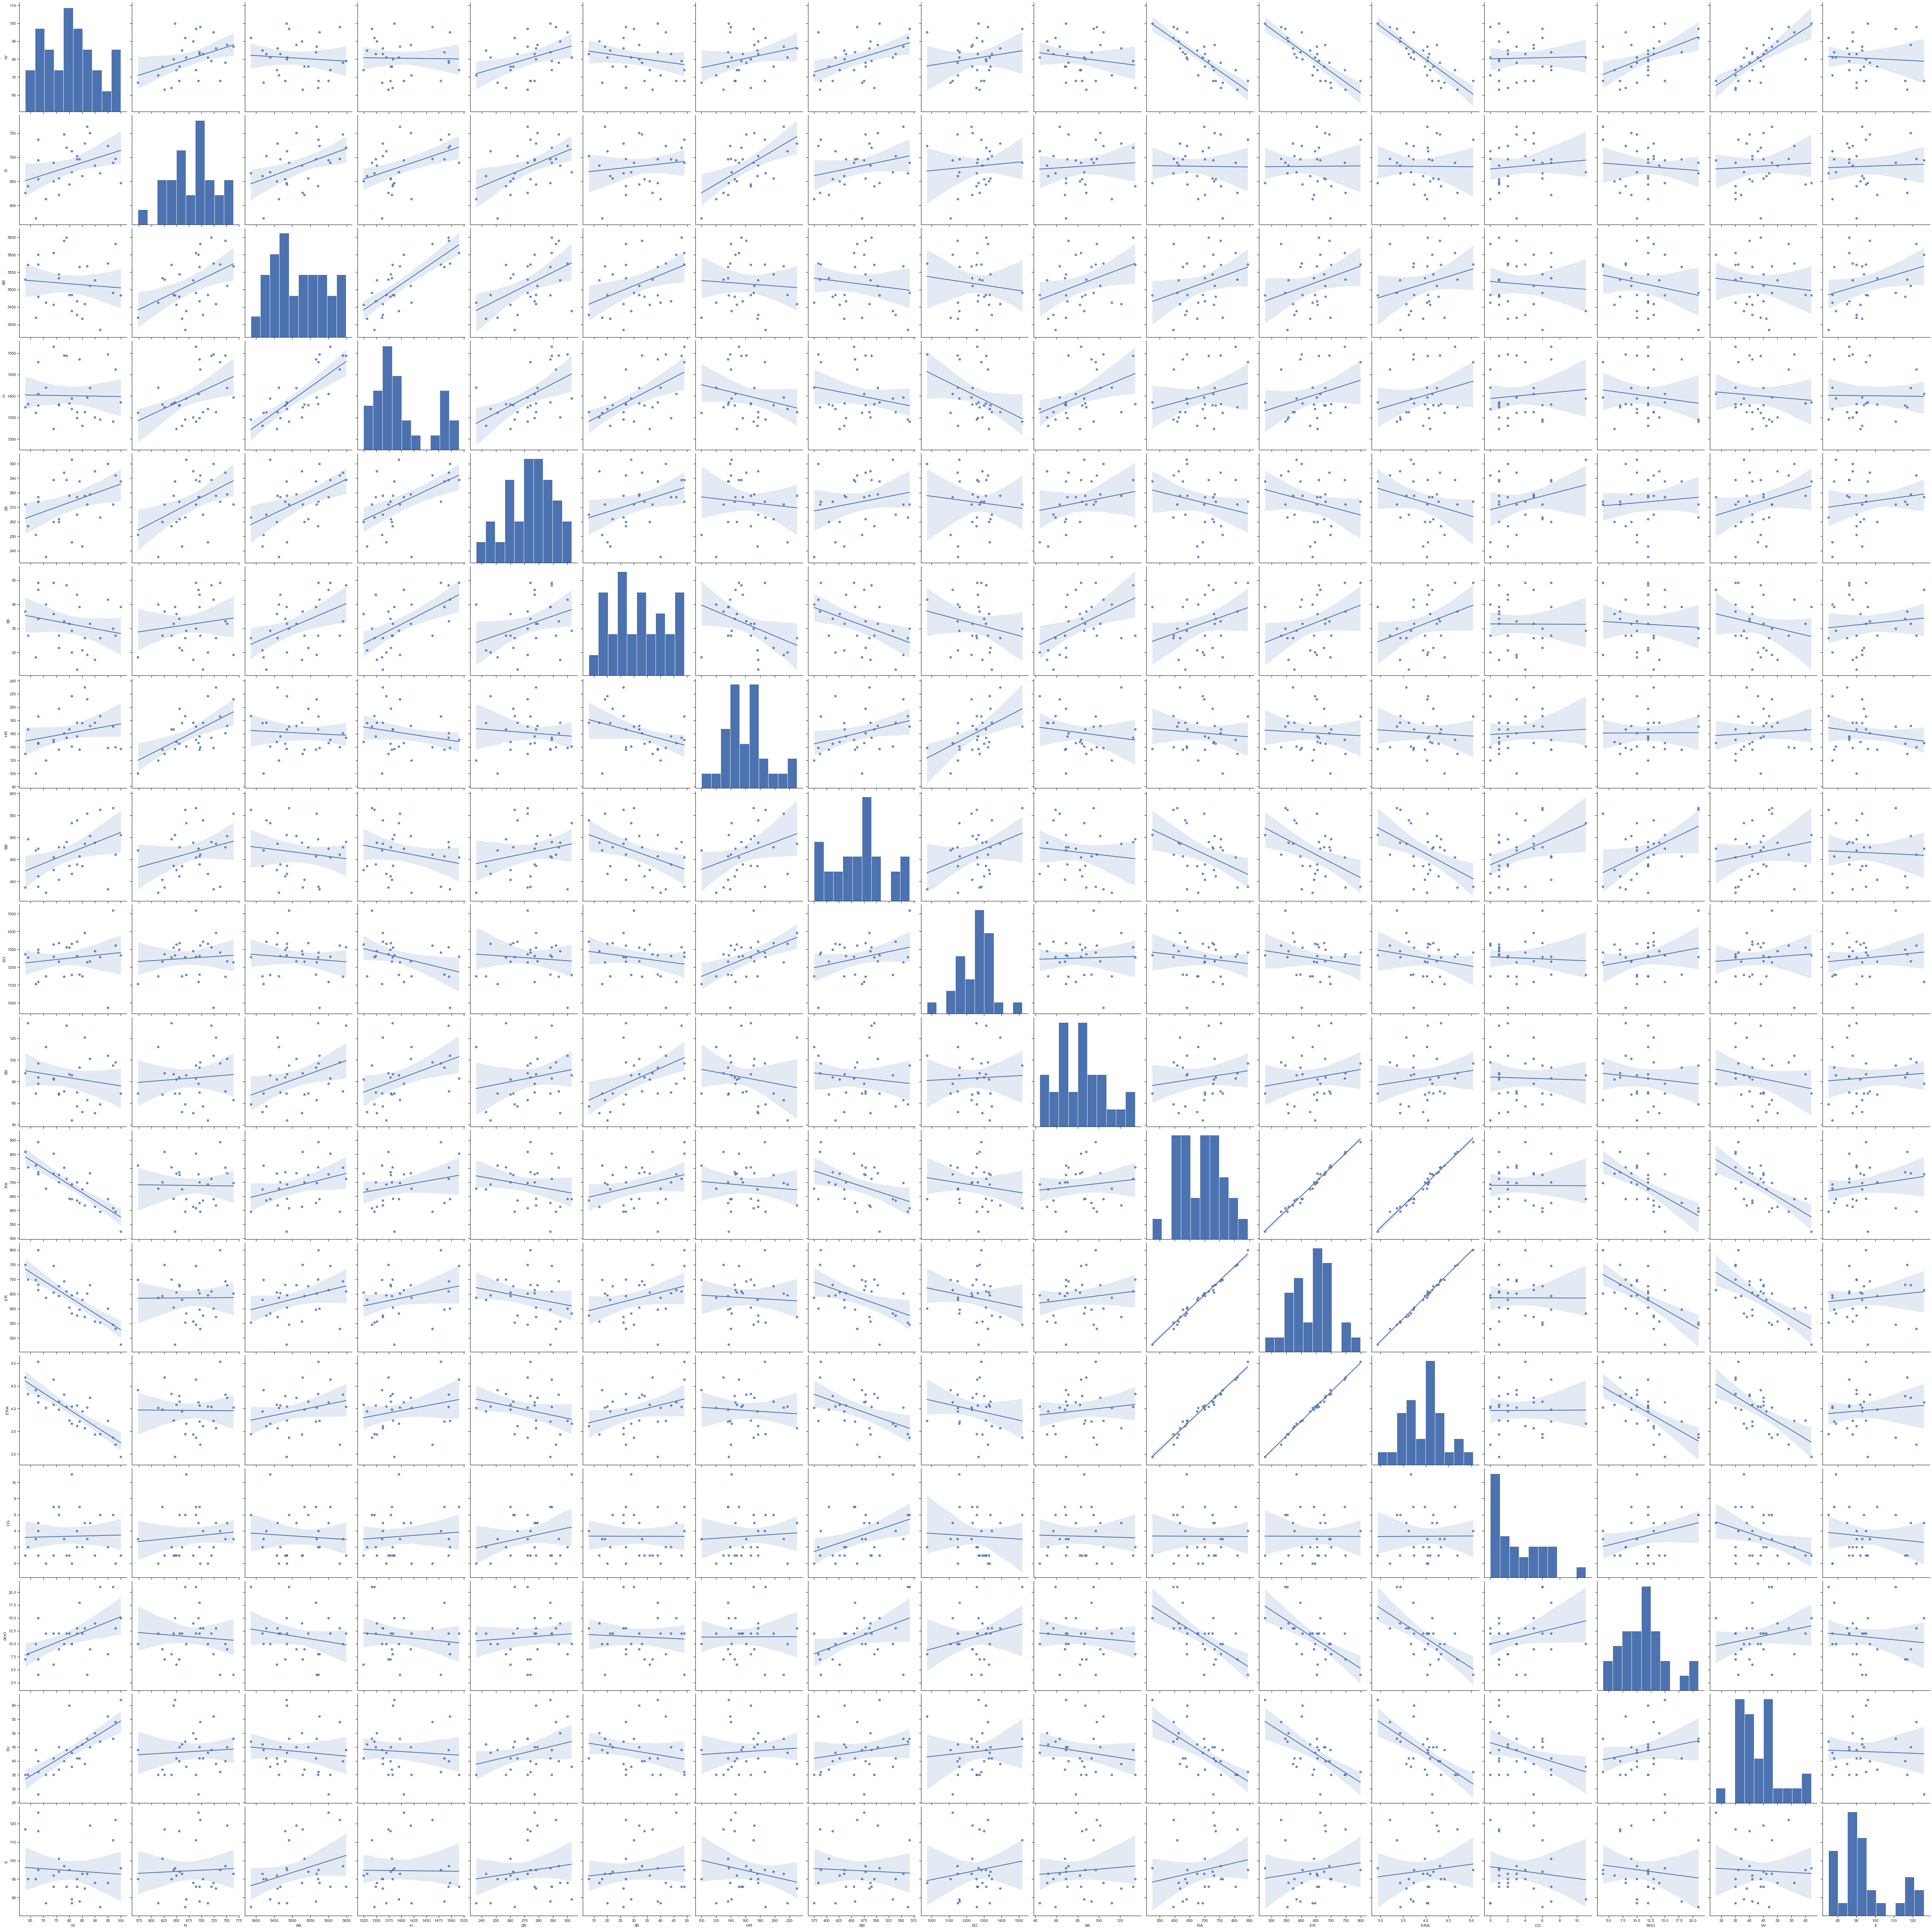

In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(baseball_new ,kind="reg",size=4.5)
plt.show()

In [27]:
#seprating input and output from baseball dataframe
df_x=baseball_new.drop(columns=['W'])
y=baseball_new[['W']]


In [28]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [30]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 64 is 0.8556290952095523


In [31]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,27)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 6}

In [32]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 51 is 0.8457286432160804


In [33]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.037628660496314616
Standard deviation in r2 score for Linear Regression :  0.5704779766442185


 Mean r2 score for KNN Regression :  -0.11525838091276566
Standard deviation in r2 score for KNN Regression :  1.2064175011139544


In [34]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [35]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 99 is 0.8991859345110923


In [36]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.23740561943839333
standard deviation for lasso ragression :  0.5553796755247082


In [37]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

In [38]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=10)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regrssion :  -0.33695635991235534
Standard Deviation r2 score for gradient boosting Regrssion :  0.36036387242237616


In [48]:
#Now Lets use ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 500}

In [49]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.0001,n_estimators=500)
print('Mean r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for ada boosting regression : 0.38877303734343444
Standard Deviation r2 score for ada boosting regression : 0.6343316291609306


In [50]:
#lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,x,y)



max r2 score corresponding to random state: 99 is 0.9431110830970942


In [51]:
# we tried all the model and till now ada boost regression is the best
#random state corresponding to highest r2_score is 47
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.30)
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.01,n_estimators=100)
ada_reg.fit(x_train,y_train)
y_pred=ada_reg.predict(x_test)

In [52]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  9.378225363019281
r2_score is :  0.35023349254598435


In [53]:
from sklearn.externals import joblib
joblib.dump(ada_reg,'baseball_model.pkl')

['baseball_model.pkl']

In [54]:
model=joblib.load('baseball_model.pkl')

In [55]:
result=pd.DataFrame(model.predict(x_test))

In [56]:
result.to_csv('baseballprdictresults.csv')